In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt

#read the data
df = pd.read_csv("/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [2]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       698 non-null    object 
 1   Open       698 non-null    float64
 2   High       698 non-null    float64
 3   Low        698 non-null    float64
 4   Close      698 non-null    float64
 5   Adj Close  698 non-null    float64
 6   Volume     698 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.3+ KB


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,98.334384,100.335100,96.009026,98.047851,98.047851,6.630727e+07
std,40.592932,41.323650,39.612367,40.518441,40.518441,7.209595e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,63.062499,64.224998,62.000000,62.887498,62.887498,2.981124e+07
50%,83.599998,85.549999,82.200001,83.900002,83.900002,4.708161e+07
75%,133.637497,135.687500,131.225002,133.250004,133.250004,7.465835e+07
max,205.800003,207.199997,194.500000,201.300003,201.300003,6.948953e+08


In [4]:
#show the stock prices progression over period of 2021-2024
figure = px.line(df, x = "Date", y = df.columns[1:-2])#px.line() is a function from Plotly Express, used to create a line plot
figure.show()


#change the format to date time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print(df["Date"])

0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
693    192.000000
694    195.199997
695    194.850006
696    189.100006
697    185.500000
Name: Close, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


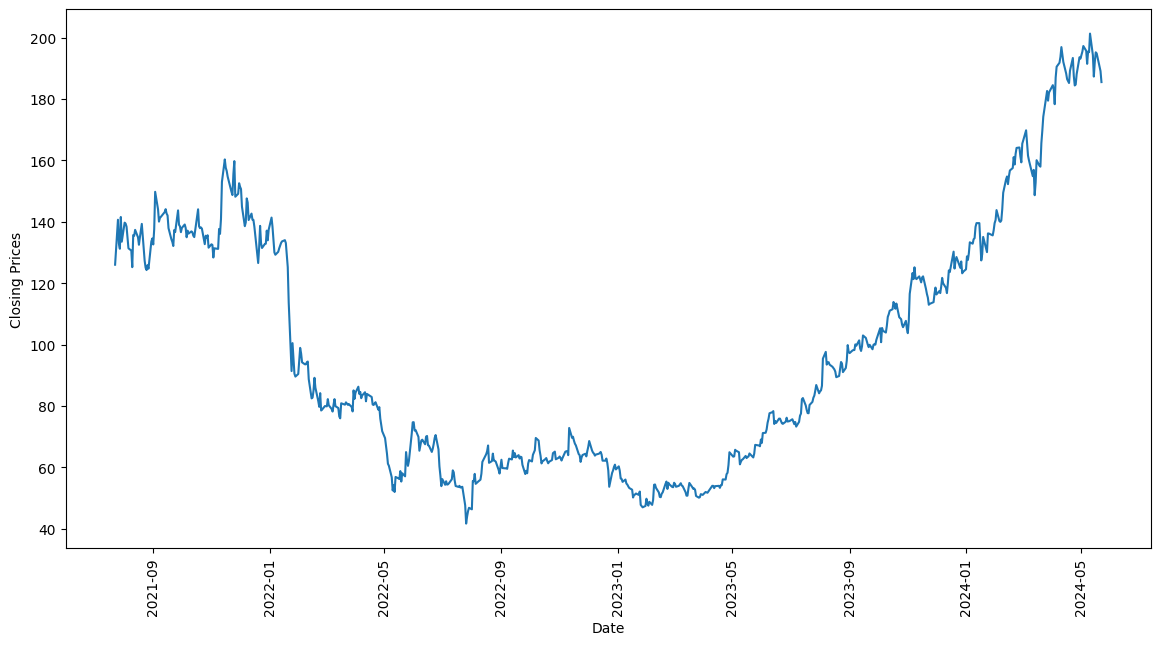

In [5]:
y = df["Close"]
print(y)

x = df["Date"]
print(x)

plt.figure(figsize=(14, 7))#adjust the figure size
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.xticks(rotation = 90)#rotate the x labels 90 degree
plt.show()

# **Model Selection and Prediction**

0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
693    192.000000
694    195.199997
695    194.850006
696    189.100006
697    185.500000
Name: Close, Length: 698, dtype: float64
           Open        High         Low     Volume
0    116.000000  138.899994  115.000000  694895290
1    126.349998  143.750000  125.300003  249723854
2    141.699997  147.800003  127.750000  240341900
3    131.000000  135.000000  123.550003  159793731
4    134.949997  144.000000  132.199997  117973089
..          ...         ...         ...        ...
693  188.800003  193.399994  183.149994   44772997
694  192.899994  195.850006  189.000000   35478593
695  195.149994  196.000000  193.100006   20841351
696  194.399994  196.500000  188.750000   33453174
697  190.000000  190.000000  183.350006   40354936

[698 rows x 4 columns]
The predicted closing prices:
603   2023-12-29
619   2024-01-23
452   2023-05-22
85    2021-11-26
416   2023-03-24
         .

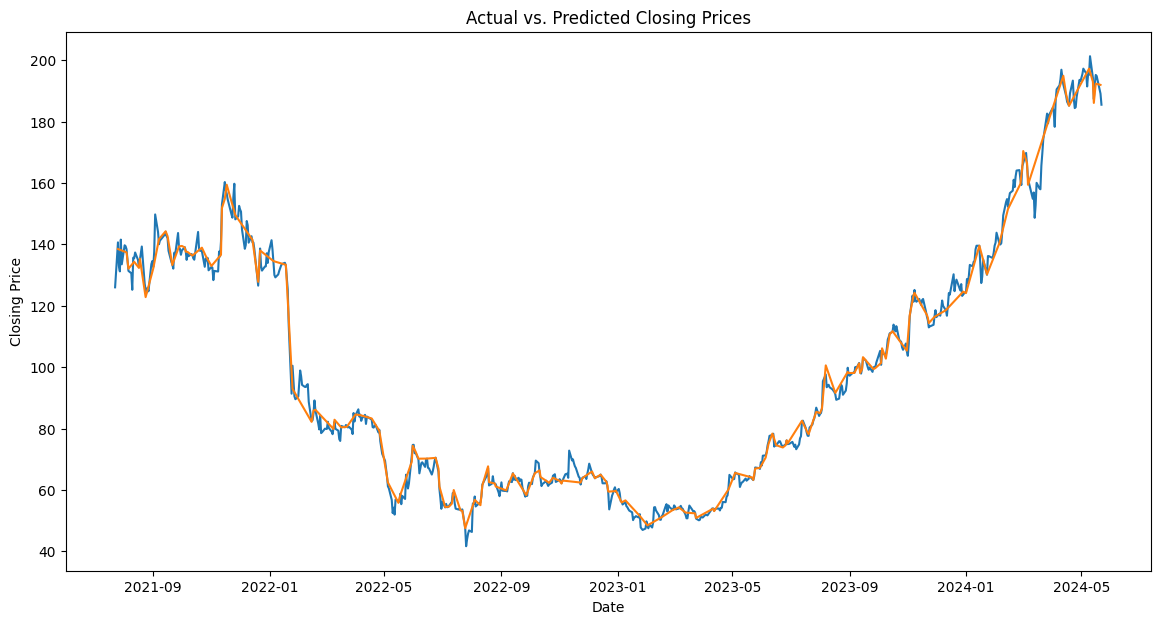

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()#we choose linear regression model

y = df["Close"]#the goal
print(y)

features_name = ["Open", "High", "Low","Volume"]#the elements
X = df[features_name]
print(X)

#divide the training data and testing data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

#then train the model
model.fit(train_X, train_y)

#predict the result
print("The predicted closing prices:")
prediction_y = model.predict(test_X)#predicted price
prediction_dates = df.iloc[test_X.index]["Date"]#corresponding date
print(prediction_dates)

# Combine and sort the predicted prices and dates
prediction_df = pd.DataFrame({"Date": prediction_dates, "Predicted Closing Price": prediction_y})
prediction_df.sort_values("Date", inplace=True)
print(prediction_df)

#draw the graph
plt.figure(figsize = (14,7))
plt.plot(df["Date"], df["Close"], label = "Actual Closing Price")
plt.plot(prediction_df["Date"], prediction_df["Predicted Closing Price"], label = "Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()